In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [2]:
data_dir='../input/classification-of-handwritten-letters/letters3'

In [3]:
letters=pd.read_csv('../input/classification-of-handwritten-letters/letters3.csv')
letters

,letter,label,file,background
0,а,1,01_231.png,3
1,а,1,01_232.png,3
2,а,1,01_233.png,3
3,а,1,01_234.png,3
4,а,1,01_235.png,3
...,...,...,...,...
6595,я,33,33_426.png,3
6596,я,33,33_427.png,3
6597,я,33,33_428.png,3
6598,я,33,33_429.png,3


In [4]:
print(letters.columns.to_list())

['letter', 'label', 'file', 'background']


In [5]:
label0=letters['letter']
Name=letters['letter'].unique()
print(Name)

['а' 'б' 'в' 'г' 'д' 'е' 'ё' 'ж' 'з' 'и' 'й' 'к' 'л' 'м' 'н' 'о' 'п' 'р'
 'с' 'т' 'у' 'ф' 'х' 'ц' 'ч' 'ш' 'щ' 'ъ' 'ы' 'ь' 'э' 'ю' 'я']


In [6]:
N0=[]
for i in range(33):
    N0+=[i]   
normal_mapping=dict(zip(Name,N0)) 
reverse_mapping=dict(zip(N0,Name)) 

In [7]:
print(normal_mapping)

{'а': 0, 'б': 1, 'в': 2, 'г': 3, 'д': 4, 'е': 5, 'ё': 6, 'ж': 7, 'з': 8, 'и': 9, 'й': 10, 'к': 11, 'л': 12, 'м': 13, 'н': 14, 'о': 15, 'п': 16, 'р': 17, 'с': 18, 'т': 19, 'у': 20, 'ф': 21, 'х': 22, 'ц': 23, 'ч': 24, 'ш': 25, 'щ': 26, 'ъ': 27, 'ы': 28, 'ь': 29, 'э': 30, 'ю': 31, 'я': 32}


In [8]:
label1=label0.map(normal_mapping)

In [9]:
datax0 = []
for im in tqdm(os.listdir(data_dir)):
    image = load_img(os.path.join(data_dir, im), color_mode='rgb', target_size=(48, 48))
    image = img_to_array(image)
    image = image / 255.0
    datax0.append(image)

100%|██████████| 6600/6600 [00:22<00:00, 295.99it/s]


In [10]:
datax1=np.array(datax0)
datay1=np.array(label1)

In [11]:
n=len(datax0)
M=[]
for i in range(n):
    M+=[i]
random.shuffle(M)

In [12]:
trainx0=datax1[M[0:(n//4)*3]]
testx0=datax1[M[(n//4)*3:]]
trainy0=datay1[M[0:(n//4)*3]]
testy0=datay1[M[(n//4)*3:]]

In [13]:
trainy2=to_categorical(trainy0)
X_train=np.array(trainx0).reshape(-1,48,48,3)
y_train=np.array(trainy2)

In [14]:
X_test=np.array(testx0).reshape(-1,48,48,3)

In [15]:
trainx,testx,trainy,testy=train_test_split(X_train,y_train,test_size=0.2,random_state=44)

In [16]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(3960, 48, 48, 3)
(990, 48, 48, 3)
(3960, 33)
(990, 33)


In [17]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [18]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(48,48,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [19]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(33, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=40)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


124/124 ━━━━━━━━━━━━━━━━━━━━ 61s 304ms/step - accuracy: 0.0396 - loss: 3.5435 - val_accuracy: 0.0313 - val_loss: 3.5094
Epoch 2/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 244ms/step - accuracy: 0.0298 - loss: 3.4972 - val_accuracy: 0.0293 - val_loss: 3.5112
Epoch 3/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 244ms/step - accuracy: 0.0365 - loss: 3.4959 - val_accuracy: 0.0273 - val_loss: 3.5077
Epoch 4/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 35s 279ms/step - accuracy: 0.0363 - loss: 3.4894 - val_accuracy: 0.0374 - val_loss: 3.5129
Epoch 5/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 248ms/step - accuracy: 0.0420 - loss: 3.4876 - val_accuracy: 0.0273 - val_loss: 3.5141
Epoch 6/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 251ms/step - accuracy: 0.0427 - loss: 3.4850 - val_accuracy: 0.0323 - val_loss: 3.5205
Epoch 7/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accuracy: 0.0385 - loss: 3.4803 - val_accuracy: 0.0313 - val_loss: 3.5112
Epoch 8/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accuracy: 0.0418 - loss: 3.4810 - val

In [22]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 410ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.04      0.03      0.03        40
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        33
           4       0.07      0.13      0.09        23
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        38
           8       0.07      0.06      0.07        31
           9       0.08      0.04      0.05        28
          10       0.03      0.04      0.04        23
          11       0.11      0.03      0.05        33
          12       0.00      0.00      0.00        29
          13       0.04      0.09      0.06        34
          14       0.01      0.03      0.01        34
          15       0.07      0.15      0.09        27
          16       0.07      0.13      

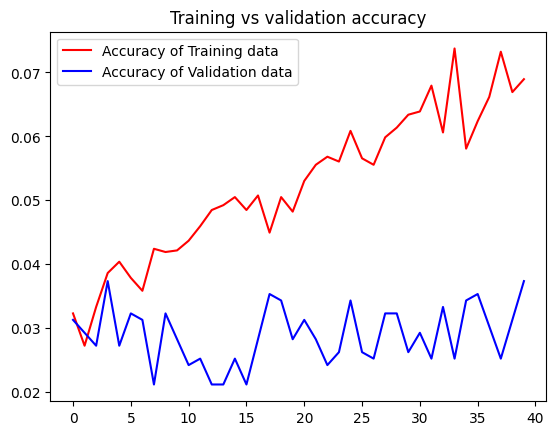

<Figure size 640x480 with 0 Axes>

In [23]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

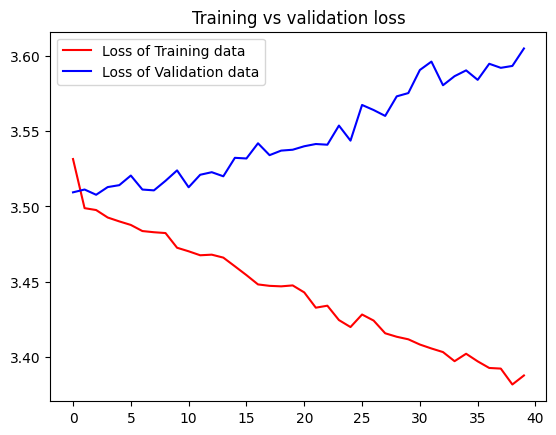

<Figure size 640x480 with 0 Axes>

In [24]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

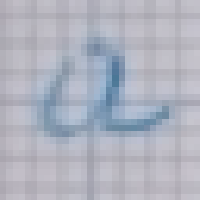

In [25]:
path0='../input/classification-of-handwritten-letters/letters3/01_320.png'
load_img(path0,target_size=(200,200))

In [26]:
image=load_img(path0,target_size=(48,48))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [27]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=reverse_mapping[value]
print("Prediction is {}.".format(move_name))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction is н.


In [28]:
pred2=model.predict(X_test)
print(pred2[0:5])

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(PRED[0:5])

52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step
[[0.02388157 0.02114795 0.02004665 0.0354265  0.05234772 0.00991166
  0.02649906 0.02184661 0.03557687 0.02318691 0.04736306 0.03062942
  0.03548472 0.01490915 0.03886603 0.02607013 0.0189895  0.03391822
  0.03792159 0.04028048 0.02013811 0.01504917 0.06315418 0.03397175
  0.02152681 0.02587941 0.02473437 0.03105752 0.01387045 0.04001747
  0.0317081  0.03480848 0.0497804 ]
 [0.02333849 0.02314675 0.00744873 0.01340656 0.00427966 0.02265274
  0.04187839 0.03577584 0.01093545 0.01027768 0.01563654 0.05120767
  0.03739582 0.05138038 0.04331419 0.08940954 0.03062071 0.01129542
  0.02007028 0.0166482  0.01246168 0.0243764  0.02298797 0.05587636
  0.03590843 0.06705125 0.03368526 0.02535126 0.04071065 0.03112105
  0.02074455 0.04131823 0.02828786]
 [0.03187323 0.02705321 0.02384717 0.03360375 0.04347422 0.02804727
  0.02966414 0.0275004  0.02362644 0.02983513 0.04276977 0.02961934
  0.02463043 0.02631019 0.02397726 0.02361129 0.03538866 0.04146088
  

In [29]:
ANS=list(testy0)
ANS[0:5]

[24, 24, 4, 12, 32]

In [30]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.029696969696969697
